<a href="https://colab.research.google.com/github/MadhurimaPaul-87/Machine_Learning/blob/main/Library_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division

**Reading the csv file**

In [2]:
df = pd.read_csv("/content/Library_Usage.csv")
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


In [4]:
def convert_years(year):
    if year == "None":
        return year
    else:
        return int(year)

In [6]:
df["Circulation Active Year"] = df['Circulation Active Year'].apply(convert_years)

# **Explanatory Data Analysis - Growth for Growth's sake?!**

**Rise of Non-Users**

In [8]:
branch_openings = {2004:0, 2005:1, 2006:1, 2007:4, 2008:2, 2009:4, 2010:3, 2011:7, 2012:0, 2013:1, 2014:1, 2015:0, 2016:0}
branch_openings = pd.Series(branch_openings)

patron_registrations = df['Year Patron Registered'].value_counts().sort_index().drop(2003)

[Text(0.5, 0, 'Year')]

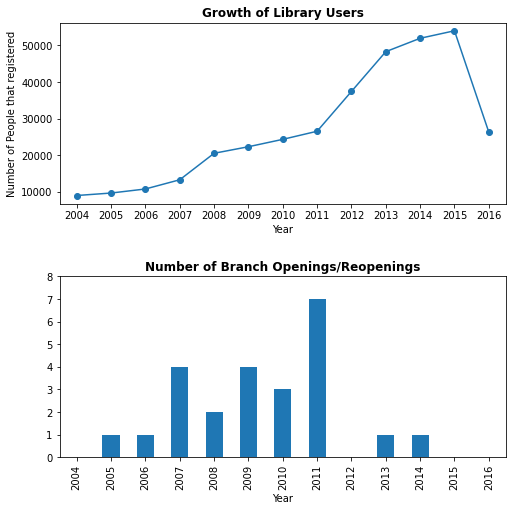

In [9]:
fig, ax = plt.subplots(2,1, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4)

plot_1 = patron_registrations.plot(marker="o", ax=ax[0], xticks=range(2004, 2017), xlim=[2003.5, 2016.5])
plot_1.set_title("Growth of Library Users", fontweight="bold")
plot_1.set(xlabel="Year", ylabel="Number of People that registered")

plot_2 = branch_openings.plot(kind="bar", ax=ax[1], ylim=[0,8], title="Number of Branch Openings/Reopenings")
plot_2.set_title("Number of Branch Openings/Reopenings", fontweight="bold")
plot_2.set(xlabel="Year")

The first graph depicts how many people registered each year for a library membership and as one can see, the number grows each year (the drop in 2016 is because the data covers only 7 months and not the whole year). There is an especially stark increase from 2011 to 2013 and then the growth rate slows down again.

In 2000, the "Branch Library Improvement Program" worth $106 million was approved and its goal was to remodel or replace 24 library branches. The number of (re-)openings during the respective years can be seen in the second graph. By far the most important year was 2011 with 7 (re-)openings. 2007 might be considered as another milestone since it's the first time that several branches were (re-)opened in one year. Hence, it was the first time where they really had something to show for the big investent decision back in 2000.

If one now compares the two graphs, you can see that right after these two important years, the number of people that registered rises sharply in 2008 and 2012 (especially the latter). Thus, the program seems to be a success in terms of user growth. But let's first take a look at the same numbers, only this time, they are separated into non-active users (people that didn't check-out something) and active-users (people that checked-out at least one book).

In [11]:
def classify_non_users(df):
    if (df['Total Checkouts']==0) and (df['Circulation Active Year']=="None"):
        return "non-user"
    if (df['Total Checkouts']>0) and (df['Circulation Active Year']=="None"):
        return "false entry"
    else:
        return "active-user"
    
df["user_type"] = df.apply(classify_non_users, axis=1)
df = df[df.user_type!="false entry"]

In [12]:
user_types = pd.crosstab(df['Year Patron Registered'], df.user_type).drop(2003)
user_types_percentages = user_types.div(user_types.sum(1), axis=0)

[[<matplotlib.axis.YTick at 0x7fda454600d0>,
 [Text(0, 0, '0%'),
  Text(0, 0, '10%'),
  Text(0, 0, '20%'),
  Text(0, 0, '30%'),
  Text(0, 0, '40%'),
  Text(0, 0, '50%')],
 Text(0.5, 0, 'Year')]

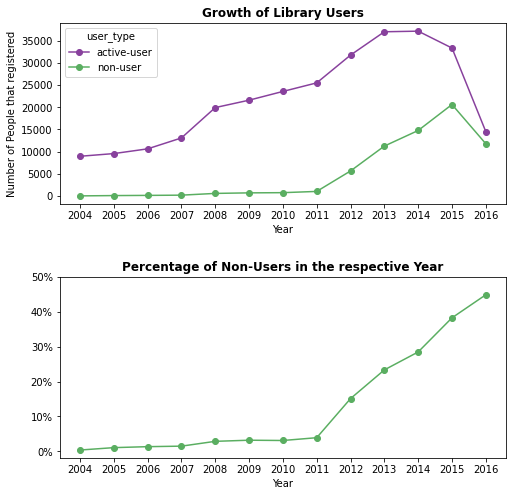

In [13]:
fig, ax = plt.subplots(2,1, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4)

plot_1 = user_types.plot(marker="o", xticks=range(2004, 2017), ax=ax[0], color=["#88419d", "#5aae61"])
plot_1.set_title("Growth of Library Users", fontweight="bold")
plot_1.set(xlabel="Year", ylabel="Number of People that registered")

plot_2 = user_types_percentages["non-user"].plot(marker="o", xticks=range(2004, 2017), ax=ax[1], color="#5aae61")
plot_2.set_title("Percentage of Non-Users in the respective Year", fontweight="bold")
plot_2.set(xlabel="Year", yticks=np.arange(0,0.6,0.1), yticklabels=["0%", "10%", "20%", "30%", "40%", "50%"])

In the upper graph, one can see that the overall increase in new registrations in 2008 comes mainly from active-users. But in 2012, it is also due to a sharp increase of non-users. Furthermore, whereas the growth of active-users flattens out in 2014 and actually decreases in 2015, the number of non-users continues to grow with a stable rate.

In the lower graph, the pattern is even more obvious. Up until 2011, the proportion of non-users among new registrations grew only moderately. But from 2012 on, it increases strongly and steadily so that it almost reaches 50% in 2016. I think that's a development that library officials don't want to happen, namely, that every second person which registers doesn't even use the library services. With such a dramatic shift, starting in 2012, there must have changed something in how the library operates.

Like already mentioned above, 2011 was a critical year for the "Branch Library Improvement Program". Furthermore, the bulk of the program was already completed (22 out of 24 branches). So, the people that were in charge of it were probably somewhat under pressure to show that the program was successful (especially since it was so expensive). The question then is: How do you measure the "success" of a library?

Something easy to measure are the number of new registrations. So, my guess is that the library tried to increase this number more proactively compared to the previous years. The question just remains as to how they got more people to sign up.

**Shrinking "Customer Loyalty"**

Text(0.5, 1.0, 'Customer Loyalty of Active-Users')

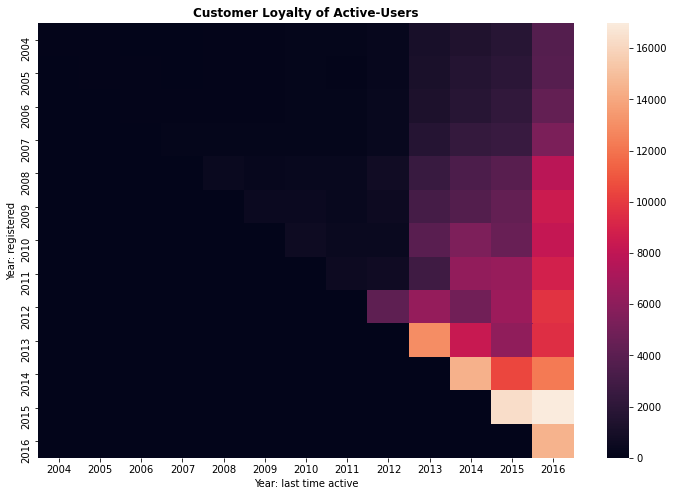

In [19]:
plt.figure(figsize=(12,8))

data = pd.crosstab(df[df.user_type=="active-user"]['Year Patron Registered'], 
                   df[df.user_type=="active-user"]['Circulation Active Year']) \
         .drop(2003).drop(2003, axis=1)

sns.heatmap(data)

plt.xlabel("Year: last time active")
plt.ylabel("Year: registered")
plt.title("Customer Loyalty of Active-Users", fontweight="bold")

This heat map illustrates the "loyalty" of library users. On the y-axis are the years plotted where patrons registered and on the x-axis are the years where the patrons were active (i.e. checked-out books) for the last time. And the darker the color of a specific square, the more people belong to that group. Thus, the biggest group are people who registered in 2015 and were last active in 2016.

If you now take a look at the first line ("Year: registered" = 2004), then you can see that the color gets darker from left to right. This means that from those that registered in 2004, the biggest group are those that are still active today in 2016. This pattern - getting darker from left to right - holds true up until 2012 where it is more mixed up. And from 2013 on, the pattern is even somewhat reversed, meaning most people were just active for one year instead of many.

This supports the finding made in point 1.1. Not only did the number of non-users increase in this period (from 2012 on) but those users that were active, were also less "loyal" than before, meaning they stopped using the library services after a short time.

**Conclusion**

From 2012 on, the number of patrons grew rapidly. But a large part of that growth was either due to patrons who didn't use the service at all, or patrons who stopped using the service after a short time. And as a library official, that's probably not a development that you would like to see.

# **Exploratory Data Analysis**

**Determining who are Non-Users**

The definition of the variable "active_year" is as follows: "Year the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library." So, let's first have a closer look at that variable:

In [21]:
df[df['Circulation Active Year']=="None"]['Total Checkouts'].value_counts()

0    67886
Name: Total Checkouts, dtype: int64

In [22]:
df[df['Circulation Active Month']=="None"]['Total Checkouts'].value_counts()

0    67886
Name: Total Checkouts, dtype: int64

There are 67,886 people who never used the services of the library. For those 18 people that actually checked-out something, the data when they were active the last time was probably simply not entered. Furthermore, if "active_year" is "None", then "acitve_month" is also "None" since they have the exactly same distributions.

Let's now have a look at the number of people who never checked-out something:

In [23]:
len(df[df['Total Checkouts']==0])

73578

This number is actually bigger than the number of people who have "None" in the active_year variable. This means that the difference (5,692) between those two numbers, is the number of people who only logged into the library’s subscription databases and didn't check-out any materials.

In [24]:
len(df[(df['Total Checkouts']==0) & (df['Circulation Active Year']=="None")])

67886

In conclusion: I'm going to classify a patron as a non-user if they never checked-out something AND if the variable active_year is "None".

**Comparing Active-Users and Non-Users**

In [26]:
ages = pd.crosstab(df['Age Range'], df.user_type)
ages_percentage = ages.div(ages.sum(1), axis=0)

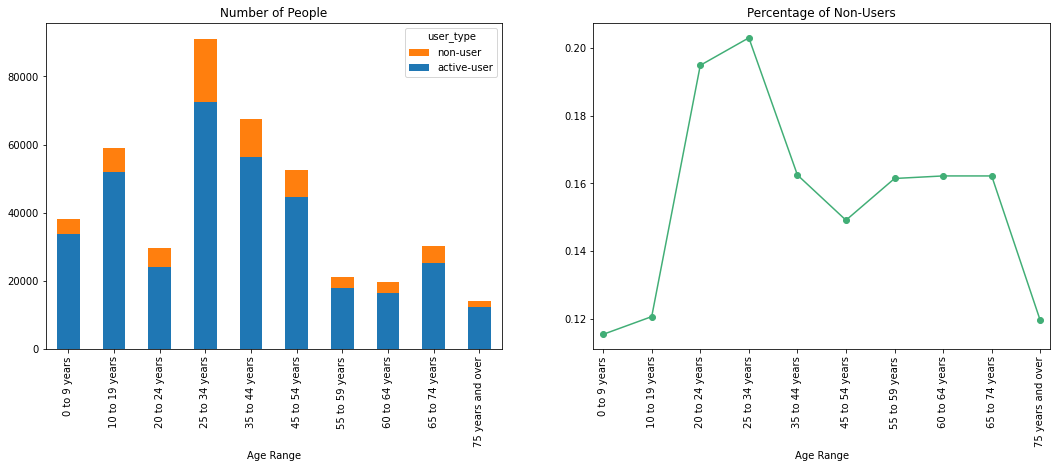

In [27]:
fig, axes = plt.subplots(1,2, figsize=(18,6))

ages.plot(kind="bar", stacked=True, legend="reverse", title="Number of People", ax=axes[0])
ages_percentage["non-user"].plot(rot=90, marker="o", xlim=(-0.2, 9.2), xticks=range(0,10), title="Percentage of Non-Users", 
                                ax=axes[1], color="#41ae76")

Percentage of Non-Users:

There are more or less 3 groups: 0-19 (and 75+), 20-34, 35-74

Number of People:

The number of below 19 is bigger than I expected
20-24 is lower than I expected (since this age group goes to college I expected it to be higher)
above 55 is pretty stable with a peak for those that retire (65-75)
25-34 is the highest and then it gradually declines

**Outside of county**

In [28]:
from statsmodels.graphics.mosaicplot import mosaic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'outside_county')

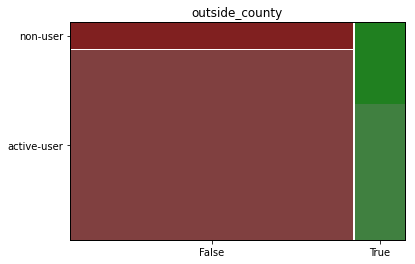

In [29]:
mosaic(df.groupby(['Outside of County', "user_type"]).size(), labelizer= lambda k: "")
plt.title("outside_county")

Most people are not from outside of the county. Those that are from outside, have a much higher non-user proportion.

**Notice preference**

Text(0.5, 1.0, 'notice_preference')

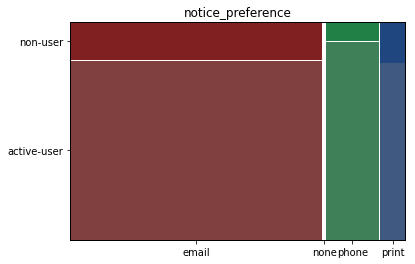

In [30]:
mosaic(df.groupby(['Notice Preference Definition', "user_type"]).size(), labelizer= lambda k: "")
plt.title("notice_preference")

The majority of people uses email as their prefered method of getting notifications. Those that use phone, have a significantly lower proportion of non-users (only half of email or print).

**Patron Type**

In [31]:
df['Patron Type Definition'].value_counts()

ADULT                  272237
JUVENILE                59208
SENIOR                  41617
YOUNG ADULT             28815
WELCOME                 14931
TEACHER CARD             1782
DIGITAL ACCESS CARD      1744
SPECIAL                   977
STAFF                     861
VISITOR                   415
AT USER ADULT             349
RETIRED STAFF             157
BOOKS BY MAIL              95
AT USER SENIOR             66
AT USER JUVENILE           47
AT USER WELCOME            45
AT USER TEEN               44
FRIENDS FOR LIFE           40
Name: Patron Type Definition, dtype: int64

The "AT USER SENIOR" patron type seems to be a duplicate of the "SENIOR" patron type, so I'm going to put them together (the other "AT USER" types as well.

In [32]:
def wrangle_patron_type(patron_type):
    if "AT USER" in patron_type:
        if "ADULT" in patron_type:
            return "ADULT"
        if "SENIOR" in patron_type:
            return "SENIOR"
        if "JUVENILE" in patron_type:
            return "JUVENILE"
        if "TEEN" in patron_type:
            return "YOUNG ADULT"
        if "WELCOME" in patron_type:
            return "WELCOME"
    else:
        return patron_type
    
df['Patron Type Definition'] = df['Patron Type Definition'].apply(wrangle_patron_type)

Text(0.5, 1.0, 'Patron Types')

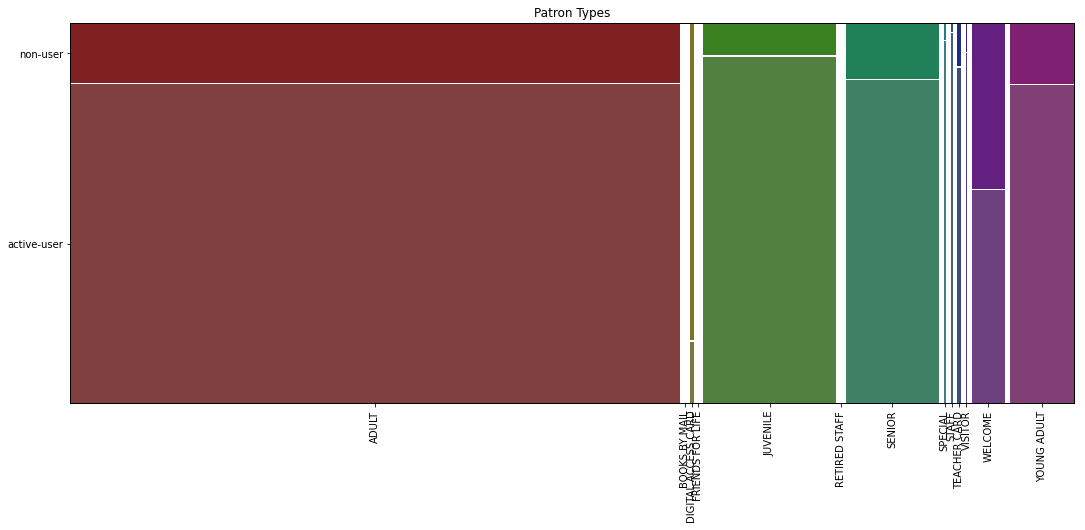

In [33]:
fig, ax = plt.subplots(1,1, figsize=(18, 7))

mosaic(df.groupby(["Patron Type Definition", "user_type"]).size(), label_rotation=[90, 0], labelizer= lambda k: "", ax=ax)
plt.title("Patron Types")

As one can see, some categories are so small that you can't read the label because they are so close together. For that reason, I'm only going to depict the biggest categories and there seem to be 5 of them.

Text(0.5, 1.0, 'Patron Types')

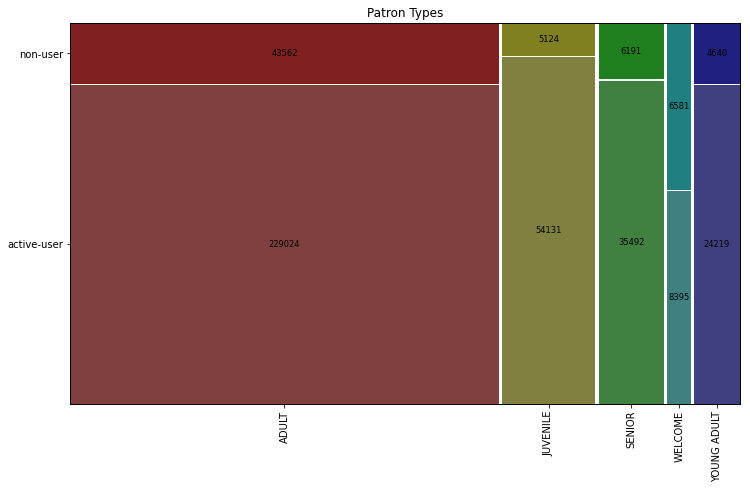

In [35]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

biggest_patrons = df['Patron Type Definition'].value_counts().head(5).index
data = df[df['Patron Type Definition'].isin(biggest_patrons)].groupby(["Patron Type Definition", "user_type"]).size()

mosaic(data, label_rotation=[90, 0], labelizer= lambda k: data[k], ax=ax)
plt.title("Patron Types")

"ADULT", "SENIOR" and "YOUNG ADULT" seem to have almost the exact same proportion of non-users (about 20%). "JUVENILE" have almost just half of that and "WELCOME" has by far the biggest proportion of non-users. Let's examine them more closely.

Text(0.5, 0, 'Year')

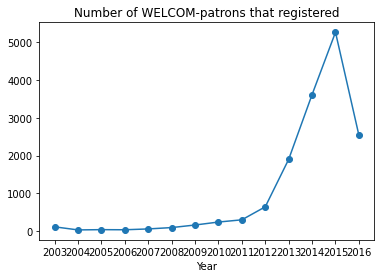

In [37]:
df[df['Patron Type Definition']=="WELCOME"]['Year Patron Registered'].value_counts().sort_index().plot(marker="o", xticks=range(2003, 2017))

plt.title("Number of WELCOM-patrons that registered")
plt.xlabel("Year")

Here again the number of people starts to rise sharply from 2012 and 2013. Hence, a proportion of the rise of non-users comes from the patron category "WELCOME". Although, there are just 7,242 non-users in this category which are about 10% of all non-users.

In [39]:
len(df[(df.user_type=="non-user") & (df['Patron Type Definition']=="WELCOME")]) / len(df[df.user_type=="non-user"])

0.0969419320625755

**Library Branches**

In [40]:
branches = pd.crosstab(df['Home Library Definition'], df.user_type)
branches_percentages = branches.div(branches.sum(1), axis=0)

Text(0.5, 1.0, 'Library Branches')

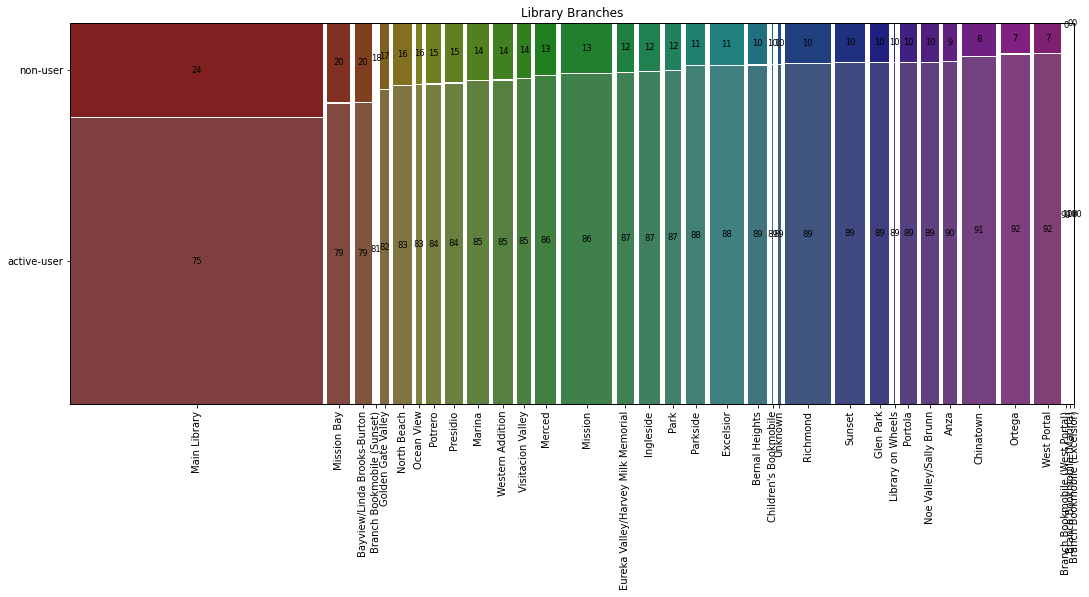

In [41]:
order = list(branches_percentages.sort_values(by="non-user", ascending=False).index)
data = branches.stack()[order]

fig, ax = plt.subplots(1,1, figsize=(18, 7))

mosaic(data, labelizer=lambda k: int((branches_percentages.stack()[k])*100), label_rotation=[90,0], ax=ax)
plt.title("Library Branches")

Most patrons are registered at the main library and there is also the highest proportion of non-users with 26%. Otherwise, there is no clear pattern.

**Year registered**

Text(0.5, 1.0, 'Number of People that registered')

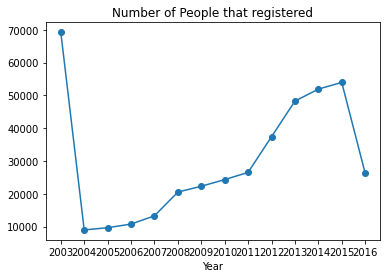

In [42]:
df['Year Patron Registered'].value_counts().sort_index().plot(marker="o", xticks=range(2003,2017))
plt.xlabel("Year")
plt.title("Number of People that registered")

In the year 2003, the database was initiated and all existing patrons were captured. That's why there is a huge spike. Let's exclude that year, so that we get a better view of the behavior of the graph.

Text(0.5, 1.0, 'Number of People that registered')

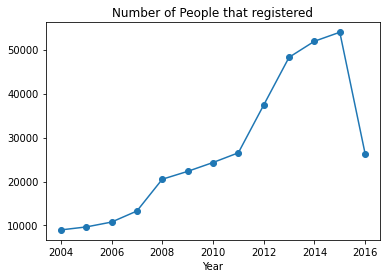

In [43]:
df['Year Patron Registered'].value_counts().sort_index().drop(2003).plot(marker="o")
plt.xlabel("Year")
plt.title("Number of People that registered")

The number of new users each year grows steadily. There are two leaps. One from 2007 to 2008 and the other from 2011 to 2013. The drop in 2016 is due to the fact that there is only data for 7 months and not the whole year.

[Text(0, 0.5, 'Number of People')]

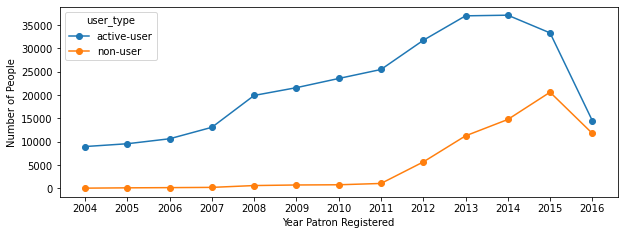

In [44]:
registration = pd.crosstab(df['Year Patron Registered'], df.user_type).drop(2003)

registration.plot(marker="o", xticks=registration.index, figsize=(10, 3.5)).set(ylabel="Number of People")

The number of active users increases steadily (with a slight jump from 2007 to 2008). In 2014 the growth stops and the number of users actually goes down again in 2015.

The number of non-users is extremely low until 2011 but then it jumps by around 5,000 people and keeps increasing at that rate. Hence, the library must have changed something in 2012 for such a stark change in pattern. Let's look at how the percentage of non-users changed over the years.

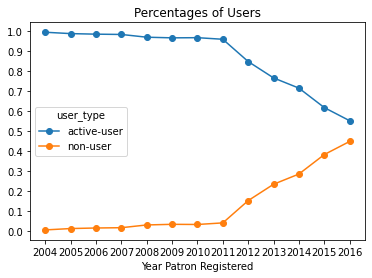

In [45]:
registration_percentages = registration.div(registration.sum(1), axis=0)

registration_percentages.plot(marker="o", title="Percentages of Users", xticks=registration.index, yticks=np.arange(0,1.1,0.1))

Here, the pattern is even more obvious. From 2011 on, the percentage of non-users increases almost 10% per year. In 2016, almost 50% of the people that registered that year were non-users. That's a trend that you don't want to have as a public library.

**The Behavior of Active-Users**

In [46]:
df_active = df[(df.user_type=="active-user") & (df['Total Checkouts']>0) & (df['Total Renewals']>0)]

**Total Checkouts**

In [50]:
df_active[df_active['Year Patron Registered']==2003]['Total Checkouts'].describe()

count    64211.000000
mean       510.497532
std        838.519310
min          1.000000
25%         72.000000
50%        212.000000
75%        593.000000
max      35907.000000
Name: Total Checkouts, dtype: float64

In [51]:
df_active[df_active['Year Patron Registered']>2003]['Total Checkouts'].describe()

count    182447.000000
mean        182.580848
std         402.556456
min           1.000000
25%          14.000000
50%          49.000000
75%         171.000000
max       25223.000000
Name: Total Checkouts, dtype: float64

For analyzing the total checkouts, I'm going to exclude the year 2003 because it is much more skewed than the other years (compare the quantiles). This way, I think the analysis should be more accurate of what a typical user looks like.



In [53]:
df_active = df_active[df_active['Year Patron Registered']>2003]

[Text(0, 0.5, 'Number of People'), Text(0.5, 0, 'Number of Check-outs')]

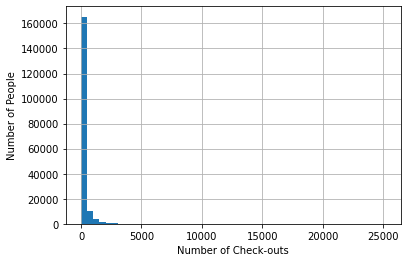

In [54]:
df_active['Total Checkouts'].hist(bins=50).set(ylabel="Number of People", xlabel="Number of Check-outs")

This distribution is extremely skewed. The great majority of people checks out only a very small number of books. On the other hand, there are people which checked out thousands of books. So let's use a logarithmic scale to get a better understanding of the situation.

[Text(0, 0.5, 'Number of People'),
 [Text(0, 0, '0'),
  Text(0, 0, '10'),
  Text(0, 0, '100'),
  Text(0, 0, '1000'),
  Text(0, 0, '10000')],
 Text(0.5, 0, 'Number of Check-outs')]

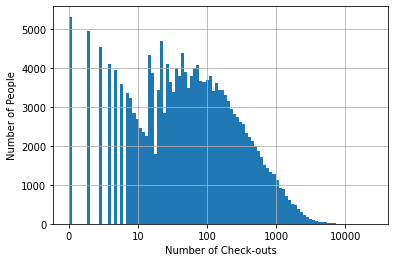

In [55]:
np.log10(df_active['Total Checkouts']).hist(bins=100).set(xticks=range(5), xticklabels=[0, 10, 100, 1000, 10000],
                                                      xlabel="Number of Check-outs", ylabel="Number of People")

The distribution is somewhat bimodal with a peak at 0 and slightly above 10. From thos peaks the number of people steadily declines. So, there seem to be two kinds of users, free-time and professional. The first group goes from 0 to slightly above 10 and the rest belongs to professionals.

To get a better understanding of the check-outs, let's calculate the average number of check-outs per year and month.

**Check-outs per Year**

In [56]:
df_active["duration"] = (df_active['Circulation Active Year'] - df_active['Year Patron Registered']) + 1 # including the first year

[Text(0, 0.5, 'Number of People'), Text(0.5, 0, 'Years of Activeness')]

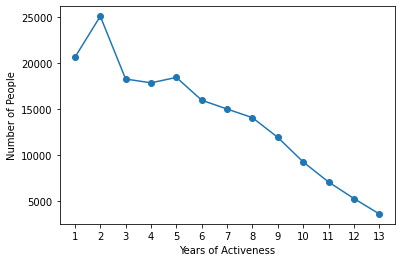

In [57]:
df_active.duration.value_counts().sort_index().plot(xticks=range(1,14), marker="o") \
         .set(xlabel="Years of Activeness", ylabel="Number of People")

Most people are active for just one year and then it declines sharply until 3 years. Then, it declines steadily which makes sense.

In [58]:
df_active['Total Checkouts'] = df_active['Total Checkouts'] / df_active.duration

def convert_to_float(number):
    return float(number)

df_active["year_checkouts"] = df_active['Total Checkouts'].apply(convert_to_float)

[Text(0, 0.5, 'Number of People'),
 [Text(0, 0, '0.1'),
  Text(0, 0, '1'),
  Text(0, 0, '10'),
  Text(0, 0, '100'),
  Text(0, 0, '1000')],
 Text(0.5, 0, 'Number of Checkouts per Year')]

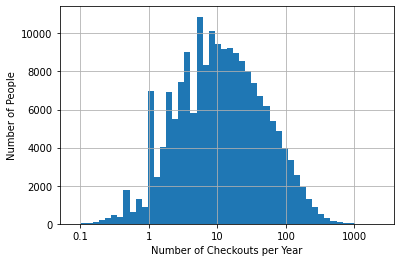

In [59]:
np.log10(df_active.year_checkouts).hist(bins=50).set(xticks=range(-1, 4), xticklabels=[0.1, 1, 10, 100, 1000],
                                                    xlabel="Number of Checkouts per Year", ylabel="Number of People")

Now it looks more like a normal distribution (with some outliers on the left side). A little bit more than half of the people check-out 10 books or less. A small fraction checks-out between 100 and 1,000 books a year.



**Check-outs per Month**

Since there is no data in which month a person registered, I'm going to treat everyone as they registered in January.



In [61]:
months = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
          "July": 7, "August": 8,"September": 9, "October": 10, "November": 11, "December": 12}

df_active["active_month"] = df_active['Circulation Active Month'].map(months)

In [63]:
df_active["duration_months"] = (df_active.duration - 1) * 12 + df_active.active_month
df_active["monthly_checkouts"] = df_active['Total Checkouts'] / df_active.duration_months
df_active["monthly_checkouts"] = df_active.monthly_checkouts.apply(convert_to_float)


[Text(0, 0.5, 'Number of People'),
 [Text(0, 0, '0.01'),
  Text(0, 0, '0.1'),
  Text(0, 0, '1'),
  Text(0, 0, '10'),
  Text(0, 0, '100')],
 Text(0.5, 0, 'Number of Checkouts per Month')]

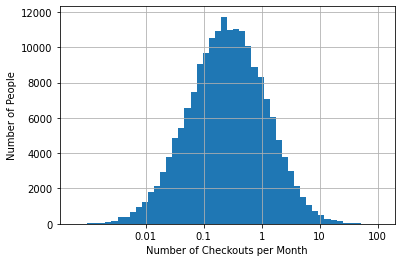

In [64]:
np.log10(df_active.monthly_checkouts).hist(bins=50).set(xticks=range(-2, 3), xticklabels=[0.01, 0.1, 1, 10, 100],
                                                       xlabel="Number of Checkouts per Month", ylabel="Number of People")


Now it looks like a normal distribution with half of the people checking-out slightly under one book per month or less. The great majority of people check-out between 0.1 and 10 books per month.

**Renewals per Month**

In [65]:
df_active["monthly_renewals"] = df_active['Total Renewals'] / df_active.duration_months
df_active["monthly_renewals"] = df_active.monthly_renewals.apply(convert_to_float)

[Text(0, 0.5, 'Number of People'),
 [Text(0, 0, '0.01'),
  Text(0, 0, '0.1'),
  Text(0, 0, '1'),
  Text(0, 0, '10'),
  Text(0, 0, '100')],
 Text(0.5, 0, 'Number of Renewals per Month')]

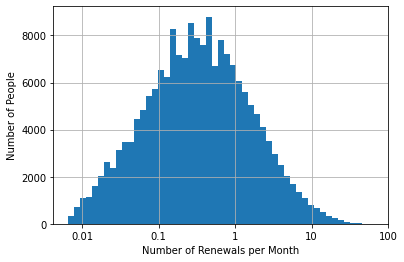

In [66]:
np.log10(df_active[df_active.monthly_renewals>0].monthly_renewals).hist(bins=50) \
  .set(xlabel="Number of Renewals per Month", ylabel="Number of People", xticks=range(-2, 3), xticklabels=[0.01, 0.1, 1 , 10, 100])

In [67]:
len(df_active[df_active.monthly_renewals==0])

0

A large portion of users never renewed a check-out.

**Comparing monthly Check-outs and Renewals**

[[Text(0, 0, '0.01'),
  Text(0, 0, '0.1'),
  Text(0, 0, '1'),
  Text(0, 0, '10'),
  Text(0, 0, '100')]]

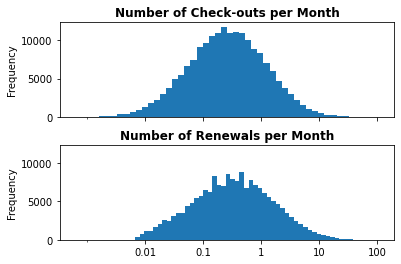

In [68]:
fig, axes = plt.subplots(2,1, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.3)

plot_1 = np.log10(df_active.monthly_checkouts).plot(kind="hist", bins=50, ax=axes[0], xticks=range(-2,3))
plot_1.set_title("Number of Check-outs per Month", fontweight="bold")

plot_2 = np.log10(df_active[df_active.monthly_renewals>0].monthly_renewals).plot(kind="hist", bins=50, ax=axes[1])
plot_2.set_title("Number of Renewals per Month", fontweight="bold")
plot_2.set(xticklabels=[0.01, 0.1, 1, 10, 100])

You can see that both variables, check-outs per month and renewals per month, look like a normal distribution. But one has to keep in mind that the x-axis is on a logarithmic scale (base 10).

In the upper histogram one can see that half of the active-users borrow slightly less than 1 book per month (i.e. 9 to 10 books a year) and the great majority checks-out less than 10 books a month. One can also see that the distribution of renewals in the lower histogram is shifted a little bit to the left in comparison to the check-outs. This means that there are fewer renewals than check-outs. The majority of people take advantage of renewals just once a month or less.

**How long stay Active-Users registered?**

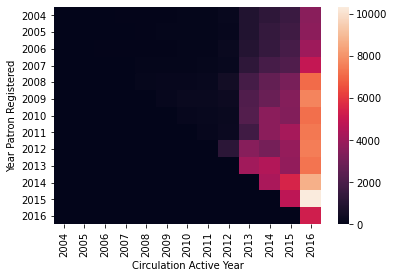

In [71]:
sns.heatmap((pd.crosstab(df_active['Year Patron Registered'], df_active['Circulation Active Year'])))


Looking at the rows from from 2004 to 2011 (year_patron_registered) you can see that the color gets darker from left to right. Hence, the largest group is the one where the users stayed registered the longest. This reverses, however, from 2013 on. Here, the largest group is that where people were registered for just 1 year.

Looking from top to bottom in column "active_year = 2016", you can see that the color also gets darker which shows the same pattern from 2.2, namely that the number of new patrons increases each year.

Another pattern can be seen when looking at the diagram vertically. From 2013 on the heat map is much darker and to the left it is much lighter.